## Introduction

Let me start by saying that this notebook is meant to be a way to improve both my Python and Machine Learning skills, using Andrew Ng's Machine Learning course as basis. The first exercise is divided in two parts: one variable and multiple variables. Given that is possible to generalize the code to accept any number of features, i chose to divide these sections by their themes: predicting profits for a food truck and predicting the price of houses. I also splitted these exercises into two files, this one corresponding to the prediction of profits for a food truck.

In [2]:
%matplotlib inline

import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Loading the Data
- Pandas' [read_csv][1] was used to read the data into a [dataframe][2];
- Custom column names was passed as argument according to the description of the exercise.

[1]: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
[2]: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

In [3]:
df = pd.read_csv(
    '../../data/ex1data1.txt', delimiter=',',
    header=None, names=['population', 'profit']
)

## Visualizing the data
- [Seaborn][1] library was used to plot the data;
- The axes returned by seaborn's [scatterplot][2] were customized aiming a better visualization.

[1]: https://seaborn.pydata.org/
[2]: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

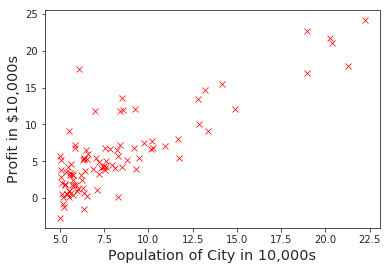

In [4]:
# Create scatter plot with some custom settings.
sns.set_style('ticks')
scat_plot = sns.scatterplot(
    x='population', y='profit', data=df,
    marker='x', color='r'
)

# Customize the axes returned by scatterplot.
ax = scat_plot.axes
ax.set_xlabel(
    'Population of City in 10,000s',
    fontsize='x-large'
)
ax.set_ylabel(
    'Profit in $10,000s',
    fontsize='x-large'
)
ax.tick_params(labelsize='medium')

plt.show()

## Computing cost
- Transform DataFrame into a numpy array and add the bias column;
- Initialize fitting parameters (theta);
- Compute and display initial cost (to test);
- Cost J is given by: $J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^{2}$

In [6]:
# Number of training examples.
m = len(df.index) 

# Turn DataFrame into a numpy array and add an extra column of ones (bias).
X = np.hstack((np.ones((m, 1)), df.values))

# Initialize fitting parameters.
theta = np.zeros((2, 1))

# Some gradient descent settings.
iterations = 1500;
alpha = 0.01;